In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Reading raw data 

In [2]:
#gdis data 
gdis = pd.read_csv('../../data/pend-gdis-1960-2018-disasterlocations.csv')
#get emdat dataset
emdat = pd.read_csv('../../data/emdat_public_2022_09_21_query_uid-47Yzpr.csv', skiprows=[0,1,2,3,4,5])
gdis.head(2)

/state/partition1/slurm_tmp/22181434.0.0/ipykernel_42991/610470096.py:4: DtypeWarning: Columns (8,16,17,18,19,24,25,26,27,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  emdat = pd.read_csv('../../data/emdat_public_2022_09_21_query_uid-47Yzpr.csv', skiprows=[0,1,2,3,4,5])


,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309


In [3]:
# This is where we obtain the statistical features
emdat.head(2)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN


In [4]:
#select certain columns from emdat and join with gdis 
# we grab the disaster number and convert it into string format and grab everything except for the last 4 ( so only the dates)
emdat['disasterno'] = emdat['Dis No'].str[:-4] #format disasterno to merge  

#These are the columns that we want to keep  , the features below are left out!
cols = ['disasterno', 'Year', 'Event Name', 
#         'Disaster Type', 'Disaster Subtype', 
#         'Region', 'Continent', #'Location',
        'Start Year', 'Start Month', 'Start Day', 
        'End Year', 'End Month','End Day',  
        "Total Damages, Adjusted ('000 US$)"] 

emdat = emdat[cols]


In [5]:
#join emdat and gdis into one dataframe
gdis = pd.merge(emdat, gdis, on = 'disasterno', how='right')

In [6]:
gdis.head(3)

,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,latitude,longitude
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,42.020948,19.418317
1,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,41.959294,19.514309
2,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,-17.093484,15.665758


In [7]:
#print 
gdis = gdis.drop_duplicates(subset=['id'])
print('shape', gdis.shape)
gdis.head(2)

shape (9924, 27)


,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,latitude,longitude
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,42.020948,19.418317
2,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,-17.093484,15.665758


In [8]:
# old grid_id 
#latitude range from -90 to 90, longitude range from -180 to 180 

# #convert lat and long into 1 degree grid: correspond to 100*100km 
# gdis['lat_grid_old'] = np.digitize(np.array(gdis['latitude']),np.arange(-90,90,1))
# gdis['lon_grid_old'] = np.digitize(np.array(gdis['longitude']),np.arange(-180,180,1)) 
# #compute the grid pair id 
# gdis['grid_id_old'] = list(zip(gdis['lat_grid_old'],gdis['lon_grid_old']))
# print('total number of grid pairs', len(gdis.grid_id.value_counts()))
# gdis[['grid_id_old','grid_id']].to_csv('grid_id_conversion.csv')

In [9]:
#new grid_id: round to integers 
gdis['lat_grid'] = gdis['latitude'].round().astype(int)
gdis['lon_grid'] = gdis['longitude'].round().astype(int)
gdis['grid_id'] = list(zip(gdis['lat_grid'],gdis['lon_grid'])) 
print('total number of grid pairs', len(gdis.grid_id.value_counts()))

# check if they lie in range
print('lon range', gdis['lon_grid'].min(), gdis['lon_grid'].max()) 
print('lat range', gdis['lat_grid'].min(), gdis['lat_grid'].max()) 

total number of grid pairs 2827
lon range -178 180
lat range -54 68


In [10]:
gdis.head(2)

,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,adm3,location,historical,hist_country,disastertype,latitude,longitude,lat_grid,lon_grid,grid_id
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,Ana E Malit,Ana E Malit,0,NaN,flood,42.020948,19.418317,42,19,"(42, 19)"
2,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,Onjiva,Onjiva,0,NaN,flood,-17.093484,15.665758,-17,16,"(-17, 16)"


In [11]:
# #count number of locations in each grid_id: ideally just 1 location per grid_id, if not, I can make grid finer. 
# gdis.groupby('grid_id').agg({'location':'nunique'}).sort_values(by='location').value_counts()

In [12]:
# # the grid with most regions 
# gdis.loc[gdis['grid_id']==(113, 295)].head(5)

### 2. Construct X

In [13]:
#pivot function: change rows of info into tables 
def pivot(df_in, id_col='disastertype', id_list=['Flood']):
    #Drop and reset the index column
    df = df_in.reset_index(drop = True)

    # one set of disaster
    for id in id_list:
        #initialize columns
        df[id+'_bin'] = 0
        df[id+'_amt'] = 0
        df[id+'_ct'] = 0
        
        
        # so if the flood happens and we find it, we create these columns and get the flood costs
        df.loc[(df[id_col]==id), id+'_bin'] = 1
        df.loc[(df[id_col]==id), id+'_amt'] = df["Total Damages, Adjusted ('000 US$)"].astype(float)
        df.loc[(df[id_col]==id), id+'_ct'] = 1

    return df


In [14]:
# id_list= df_sub['Disaster Type'].unique()
id_list= gdis['disastertype'].unique().tolist()
print(id_list)
df_pivot= pivot(gdis, id_col = 'disastertype', id_list = id_list)
df_pivot


['flood', 'storm', 'earthquake', 'extreme temperature ', 'landslide', 'volcanic activity', 'drought', 'mass movement (dry)']


,disasterno,Year,Event Name,Start Year,Start Month,Start Day,End Year,End Month,End Day,"Total Damages, Adjusted ('000 US$)",...,landslide_ct,volcanic activity_bin,volcanic activity_amt,volcanic activity_ct,drought_bin,drought_amt,drought_ct,mass movement (dry)_bin,mass movement (dry)_amt,mass movement (dry)_ct
0,2009-0631,2009.0,NaN,2009.0,12.0,27.0,2010.0,1.0,8.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
1,2001-0146,2001.0,NaN,2001.0,4.0,2.0,2001.0,4.0,9.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
2,2009-0092,2009.0,NaN,2009.0,3.0,1.0,2009.0,4.0,16.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
3,2010-0105,2010.0,NaN,2010.0,3.0,1.0,2010.0,3.0,17.0,NaN,...,0,0,0.0,0,0,0.0,0,0,0.0,0
4,1995-0082,1995.0,NaN,1995.0,5.0,15.0,1995.0,5.0,15.0,1422569.0,...,0,0,0.0,0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,1960-0011,1960.0,Manam,1960.0,3.0,17.0,1960.0,3.0,17.0,NaN,...,0,1,NaN,1,0,0.0,0,0,0.0,0
9920,2009-9633,2009.0,NaN,2009.0,NaN,NaN,2010.0,NaN,NaN,NaN,...,0,0,0.0,0,1,NaN,1,0,0.0,0
9921,1990-9289,1990.0,NaN,1990.0,NaN,NaN,1990.0,NaN,NaN,NaN,...,0,0,0.0,0,1,NaN,1,0,0.0,0
9922,1969-9069,1969.0,NaN,1969.0,NaN,NaN,1971.0,NaN,NaN,73867.0,...,0,0,0.0,0,1,73867.0,1,0,0.0,0


In [15]:
df_pivot.columns

Index(['disasterno', 'Year', 'Event Name', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Damages, Adjusted ('000 US$)', 'id', 'country', 'iso3', 'gwno',
       'year', 'geo_id', 'geolocation', 'level', 'adm1', 'adm2', 'adm3',
       'location', 'historical', 'hist_country', 'disastertype', 'latitude',
       'longitude', 'lat_grid', 'lon_grid', 'grid_id', 'flood_bin',
       'flood_amt', 'flood_ct', 'storm_bin', 'storm_amt', 'storm_ct',
       'earthquake_bin', 'earthquake_amt', 'earthquake_ct',
       'extreme temperature _bin', 'extreme temperature _amt',
       'extreme temperature _ct', 'landslide_bin', 'landslide_amt',
       'landslide_ct', 'volcanic activity_bin', 'volcanic activity_amt',
       'volcanic activity_ct', 'drought_bin', 'drought_amt', 'drought_ct',
       'mass movement (dry)_bin', 'mass movement (dry)_amt',
       'mass movement (dry)_ct'],
      dtype='object')

In [16]:
#aggregate columns by year
# We need to include the longitude and lattitude here 
def aggregate_yrly(df):
    #aggregate count
    col_ct = [col for col in df.columns if '_ct' in col]
    df_ct = df.groupby(['grid_id','year'])[col_ct].agg('sum')
    
    #aggregate amount 
    col_amt = [col for col in df.columns if '_amt' in col]
    df_amt = df.groupby(['grid_id','year'])[col_amt].agg('sum')
    
    #aggregate binary
    col_bin = [col for col in df.columns if '_bin' in col]
    df_bin= df.groupby(['grid_id','year'])[col_bin].agg('max')

    #join
    df1= pd.concat([df_amt, df_ct], axis=1)
    df_out = pd.concat([df1, df_bin], axis=1)
    
    return df_out.reset_index()



df_yrly = aggregate_yrly(df_pivot)
# df_yrly.to_csv('../../data/df_yrly.csv')

In [17]:
df_yrly.columns

Index(['grid_id', 'year', 'flood_amt', 'storm_amt', 'earthquake_amt',
       'extreme temperature _amt', 'landslide_amt', 'volcanic activity_amt',
       'drought_amt', 'mass movement (dry)_amt', 'flood_ct', 'storm_ct',
       'earthquake_ct', 'extreme temperature _ct', 'landslide_ct',
       'volcanic activity_ct', 'drought_ct', 'mass movement (dry)_ct',
       'flood_bin', 'storm_bin', 'earthquake_bin', 'extreme temperature _bin',
       'landslide_bin', 'volcanic activity_bin', 'drought_bin',
       'mass movement (dry)_bin'],
      dtype='object')

In [18]:
print(len(df_yrly))

8691


In [19]:
# # We want to remove years that are before 1979 as we don't have data for those in google earths
# df_yrly = df_yrly.loc[df_yrly['year']>=1979].reset_index(drop=True)
# print(len(df_yrly))

In [20]:
df_yrly.year.min()

1960

### Construct Y Master
look up table for all the previous flood events

In [21]:
bin_col =  [col for col in df_yrly.columns if '_bin' in col]
df_yrly_bin = df_yrly[['grid_id','year'] + bin_col]


In [22]:
# #get a list of disasters and flood_id 
# all_dis = gdis[['grid_id','Year','disastertype']]

# #
# flood = all_dis.loc[all_dis['disastertype']=='flood']
# flood

In [23]:
# get a list of grid_ids 
grid_id = gdis['grid_id'].unique()
# get a list of year information 
print(gdis.Year.min(), gdis.Year.max())
year_id = np.arange(1960, 2019, 1) 
#create multi-index: each grid id, spanning over the years 
idd = pd.MultiIndex.from_product([grid_id, year_id],
                           names=['grid_id', 'year'])

#length should be |years| * |grid_ids| 
print(len(idd))
#get dataframe 
idd = idd.to_frame().reset_index(drop=True)


1960.0 2018.0
166793


In [24]:
#master disaster targets for all years and all ids: 
#merge with df_yrly 
y_master = pd.merge(idd, df_yrly_bin, on=['grid_id','year'], how='left').fillna(0)

#keep just the binary
# y_master.sum(axis=0)

In [25]:
#check: 
print(y_master['flood_bin'].sum()) #total number of binary flood targets 

#total number of flood incidents: 
print(gdis.loc[gdis['disastertype']=='flood'].shape[0])

#the two numbers are slightly different, but that's because some country have more than 1 flood per year 



4015.0
4274


In [26]:
# construct next n year target -> look up this table 
y_master


,grid_id,year,flood_bin,storm_bin,earthquake_bin,extreme temperature _bin,landslide_bin,volcanic activity_bin,drought_bin,mass movement (dry)_bin
0,"(42, 19)",1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(42, 19)",1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(42, 19)",1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(42, 19)",1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(42, 19)",1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
166788,"(9, 30)",2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166789,"(9, 30)",2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166790,"(9, 30)",2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166791,"(9, 30)",2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filter data to previously flooded regions 


In [27]:
#step 1: filter xy_df to those grid_ids with previous frequent flooding history 
agg = df_yrly.groupby('grid_id').agg({'flood_bin':'sum'})
grid_id_ls = agg.loc[agg['flood_bin']>=2].index.tolist()
print('no of grid_ids selected', len(grid_id_ls))


#step 2: interpolate years to record all years, fill with 0 without any flood using idd 
#create multi-index: each grid id, spanning over the years 
year_id = np.arange(1960, 2019, 1) 
idd = pd.MultiIndex.from_product([grid_id_ls, year_id],
                           names=['grid_id', 'year'])

#length should be |years| * |grid_ids| 
print('len of idd', len(idd))
#get dataframe 
idd = idd.to_frame().reset_index(drop=True)


no of grid_ids selected 830
len of idd 48970


In [28]:
df_yrly.shape


(8691, 26)

### attach NLP feature

In [30]:
import pickle 
print(pickle.format_version)

#load processed nlp features: 
#note: you can load other nlp features too, they all start with 'nlp_*' 
file = open('../../data/nlp_cls_transfer_new.pkl', 'rb') 
# load file
df_nlp = pickle.load(file)
# close the file
file.close()
df_nlp.shape

4.0


(2827, 38)

In [31]:
# #convert old grid id to new grid id 
# grid_id_map = pd.read_csv('../../data/grid_id_conversion.csv', index_col=0)
# grid_id_map = grid_id_map.drop_duplicates(subset=['grid_id_old'], keep='first')
# df_nlp = df_nlp.rename(columns={'grid_id':'grid_id_old'})
# print(df_nlp.shape, grid_id_map.shape)
# df_nlp = df_nlp.merge(grid_id_map, on='grid_id_old', how='left').drop('grid_id_old', axis=1)
# print(df_nlp.shape)
# #drop duplicates 
# df_nlp = df_nlp.drop_duplicates(subset='grid_id', keep='first')
# print(df_nlp.shape)

In [33]:
#fixing formatting error: change string of tuple of grid_id to tuple 
def string_to_tuple(df, col): 
    try: 
        df[col] = df.apply(lambda row: eval(row[col]), axis=1) 
    except: 
        'error converting to tuple'
    return df 


In [34]:
#attach nlp to xy_df 
def attach_nlp(xy_df, df_nlp):
    #correct formatting for df_nlp 
    df_nlp = string_to_tuple(df_nlp, 'grid_id')
    #drop text, location and label columns 
    df_nlp = df_nlp.drop(['location','txt','label','flood_ct'], axis=1)
    #add prefix 
    df_nlp = df_nlp.rename(columns={c: 'nlp_' + str(c) for c in df_nlp.columns if c not in ['grid_id']})
    #merge 
    xy_df_out = pd.merge(xy_df, df_nlp , on='grid_id', how='left')
    print('shape of xy_df with nlp features', xy_df_out.shape)
    return xy_df_out 



In [36]:
df_nlp.head(2)

,Unnamed: 0,grid_id,location,txt,flood_ct,label,0,1,2,3,...,22,23,24,25,26,27,28,29,30,31
0,0,"(-54, -72)",['Punta Arenas'],"Located on the Brunswick Peninsula, Punta Aren...",1.0,0,-0.209216,0.031426,-0.260515,0.802810,...,-0.360055,0.447780,0.275199,0.334422,0.636680,0.535607,-0.073433,0.409817,-0.040203,-0.132304
1,1,"(-49, -73)","["" O'Higgins""]",In pre-Quaternary times extensive Nothofagus f...,1.0,0,-0.169696,0.014526,-0.299183,0.848698,...,-0.335211,0.505374,0.389265,0.278417,0.600104,0.568268,-0.069096,0.394743,-0.012003,-0.118689


### Attach ERA features 

In [37]:
# read era_features (ran from above cell)
df_era = pd.read_csv('../../data/era_features.csv', index_col=0)
df_era['grid_id'] = list(zip(df_era['lat'],df_era['long']))

In [38]:
df_era.head(2)

,1_mean_2m_air_temperature,1_minimum_2m_air_temperature,1_maximum_2m_air_temperature,1_dewpoint_2m_temperature,1_total_precipitation,1_surface_pressure,1_mean_sea_level_pressure,1_u_component_of_wind_10m,1_v_component_of_wind_10m,2_mean_2m_air_temperature,...,12_dewpoint_2m_temperature,12_total_precipitation,12_surface_pressure,12_mean_sea_level_pressure,12_u_component_of_wind_10m,12_v_component_of_wind_10m,year,lat,long,grid_id
0,283.617432,274.514099,293.051849,279.182190,0.215081,92250.945312,101025.101562,2.339942,-1.741069,283.682892,...,278.507690,0.214973,91823.835938,100589.523438,1.331599,-1.586958,1979,-46,168,"(-46, 168)"
1,284.689545,273.895508,295.293182,280.788971,0.264142,92111.539062,100855.046875,1.082877,-0.996928,282.993622,...,280.121765,0.088443,92457.976562,101241.312500,0.833229,-0.764634,1980,-46,168,"(-46, 168)"


In [39]:
#attach era features
def attach_era(xy_df, df_era):
    #add prefix 
    df_era = df_era.rename(columns={c: 'era_' + c for c in df_era.columns if c not in ['grid_id','year']})
    xy_df_out = pd.merge(xy_df, df_era, on=['grid_id','year'], how='left') # for the ERA data set we shouldn't have this problem
    print('shape of xy_df with era features', xy_df_out.shape)
    return xy_df_out


## Run Experiments 

In [40]:
# pwd
import sys
# setting path
sys.path.append('../../src')

#import model training module 
import models as m 

#split training and testing 
from sklearn.model_selection import train_test_split
# import shap
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

/home/gridsan/czeng12/.local/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [41]:
#attach target for a particular disease for next n years, using y_master  
#next_n is how we choose the next n-periods for the prediction target
def attach_target(x_df, y_master, disaster, next_n): 
    y = y_master.copy()
    #shift years
    y['year'] = y['year'] - next_n
    #keep for particular disaster 
    y = y[['grid_id','year',disaster+'_bin']]
    # Rename into target
    y = y.rename(columns={disaster +'_bin': 'target_' + disaster + '_'+ str(next_n)})
    xy_df = pd.merge(x_df, y, on = ['grid_id','year'], how='inner')
    return xy_df


In [67]:
#construct x_df with various modalities: stat, nlp, era features 

#select to those id pass the filtering criteria 
x_df = df_yrly.loc[df_yrly['grid_id'].isin(grid_id_ls)]
#interpolate missing years to have no flood 
x_df = pd.merge(idd, x_df, on=['grid_id','year'], how='left').fillna(0)
#add back lat and long info 
x_df[['lat', 'lon']] = pd.DataFrame(x_df['grid_id'].tolist(), index=x_df.index)

print('length of x_df', len(x_df))

#attach nlp features 
x_df = attach_nlp(x_df, df_nlp)
# #attach era features 
# x_df = attach_era(x_df, df_era)


length of x_df 48970
shape of xy_df with nlp features (48970, 61)


In [68]:
x_df

,grid_id,year,flood_amt,storm_amt,earthquake_amt,extreme temperature _amt,landslide_amt,volcanic activity_amt,drought_amt,mass movement (dry)_amt,...,nlp_22,nlp_23,nlp_24,nlp_25,nlp_26,nlp_27,nlp_28,nlp_29,nlp_30,nlp_31
0,"(-46, 168)",1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.276420,0.517851,0.305204,0.255942,0.599338,0.480535,0.011092,0.460605,-0.027624,-0.233164
1,"(-46, 168)",1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.276420,0.517851,0.305204,0.255942,0.599338,0.480535,0.011092,0.460605,-0.027624,-0.233164
2,"(-46, 168)",1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.276420,0.517851,0.305204,0.255942,0.599338,0.480535,0.011092,0.460605,-0.027624,-0.233164
3,"(-46, 168)",1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.276420,0.517851,0.305204,0.255942,0.599338,0.480535,0.011092,0.460605,-0.027624,-0.233164
4,"(-46, 168)",1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.276420,0.517851,0.305204,0.255942,0.599338,0.480535,0.011092,0.460605,-0.027624,-0.233164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48965,"(66, 130)",2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.397515,0.438513,0.414853,0.269744,0.701284,0.537417,-0.074871,0.455416,-0.038865,-0.201588
48966,"(66, 130)",2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.397515,0.438513,0.414853,0.269744,0.701284,0.537417,-0.074871,0.455416,-0.038865,-0.201588
48967,"(66, 130)",2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.397515,0.438513,0.414853,0.269744,0.701284,0.537417,-0.074871,0.455416,-0.038865,-0.201588
48968,"(66, 130)",2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.397515,0.438513,0.414853,0.269744,0.701284,0.537417,-0.074871,0.455416,-0.038865,-0.201588


In [69]:
x_df
#attach era features 
x_df = attach_era(x_df, df_era)
x_df

shape of xy_df with era features (48970, 171)


,grid_id,year,flood_amt,storm_amt,earthquake_amt,extreme temperature _amt,landslide_amt,volcanic activity_amt,drought_amt,mass movement (dry)_amt,...,era_12_minimum_2m_air_temperature,era_12_maximum_2m_air_temperature,era_12_dewpoint_2m_temperature,era_12_total_precipitation,era_12_surface_pressure,era_12_mean_sea_level_pressure,era_12_u_component_of_wind_10m,era_12_v_component_of_wind_10m,era_lat,era_long
0,"(-46, 168)",1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(-46, 168)",1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(-46, 168)",1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(-46, 168)",1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(-46, 168)",1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48965,"(66, 130)",2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,222.198700,253.161835,231.160919,0.003599,93446.234375,102602.429688,0.545867,1.076254,66.0,130.0
48966,"(66, 130)",2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,224.318024,252.043198,233.094879,0.004879,92895.375000,101973.484375,0.617143,1.223129,66.0,130.0
48967,"(66, 130)",2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,222.874695,248.088684,231.240509,0.007923,92778.609375,101931.679688,0.447497,1.075546,66.0,130.0
48968,"(66, 130)",2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223.517151,250.919647,230.685150,0.003803,93443.539062,102666.773438,0.645573,1.060859,66.0,130.0


In [70]:
#construct xy_df, depending on the n_pred target period 
n_pred = 2

# x_df = x_df.loc[x_df['year']>=1979] #crop to after 1979 
xy_df = attach_target(x_df, y_master, 'flood', n_pred)
print('length of xy_df', len(xy_df))
print('imbalance', xy_df.filter(regex='target').sum()/len(xy_df))

#construct x,y train and test set 
x = xy_df.drop(xy_df.filter(regex='target').columns, axis=1)#drop target col 
x = x.select_dtypes(['number'])#drop index col
y = xy_df.filter(regex='target') #filter to cols containing target 

length of xy_df 47310
imbalance target_flood_2    0.063517
dtype: float64


In [71]:
#stat features only 
x_stat = x.drop(x.filter(regex='nlp').columns, axis=1)#drop nlp features  
x_stat = x_stat.drop(x.filter(regex='era').columns, axis=1)#drop era features 

#stat + era 
x_stat_era = x.drop(x.filter(regex='nlp').columns, axis=1)#drop nlp features  

#stat + nlp 
x_stat_nlp = x.drop(x.filter(regex='era').columns, axis=1)#drop nlp features  

#stat + nlp + era 
x_stat_nlp_era = x.copy()

In [72]:
def my_fillna(df):
    pct = (df.isna().sum().sum())/(df.shape[0]*df.shape[1])
    print('total nan pct filled with 0', pct)
    df = df.fillna(0)
    return df 

In [73]:
def run_all_models(x, y):

    #train_test_split 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    print(x_train.shape) #x_train contains stat features only 
    
#     #try a dumb model predicting just zeros , we are just guessing no flood!
#     y_base = np.zeros(len(y_test)) 
#     print('Dumb baseline AUC', metrics.roc_auc_score(y_test,y_base))
#     results['base1']=m.get_scores_clf(y_test,y_base)

#     #try a less dumb model predicting outcome = current flood outcome 
#     y_base2 = x_test['flood_bin'] 
#     print('Dumb baseline 2 AUC', metrics.roc_auc_score(y_test,y_base2))
#     results['base2']= m.get_scores_clf(y_test,y_base2)
    
    #logreg model 
    y_pred, y_pred_prob = m.run_logreg(x_train, y_train, x_test)
    sc_log = m.get_scores_clf(y_test, y_pred_prob)
    # print('Test AUC', metrics.roc_auc_score(y_test, y_pred_prob))
    
    y_pred, y_pred_prob = m.run_xgb(x_train, y_train, x_test)
    sc_xgb = m.get_scores_clf(y_test, y_pred_prob)

    return sc_log, sc_xgb  


In [74]:
results={}
i=0 
for x_i in [x_stat,  x_stat_nlp, x_stat_era, x_stat_nlp_era]: #x_stat_era 
    print('x_i shape', x_i.shape)
    x_i = my_fillna(x_i)
    sc_log, sc_xgb = run_all_models(x_i,y)
    results[str(i) + '_logreg'] = sc_log
    results[str(i) + '_xgb'] = sc_xgb 
    i+=1 
    

x_i shape (47310, 24)
total nan pct filled with 0 0.0
(33117, 24)
running log reg...
Train AUC:  0.5532643885337847
maximum f1 score, thres 0.4924887009768188 0.6
auc, f1, accu, accu_bl, precision, recall=  0.5516375102868922 0.48734665118541565 0.934333826534207 0.5042619103879279 0.06804155988582113 0.00972972972972973
[[13252    16]
 [  916     9]]
running xgb...
Train AUC:  0.7872547669530908
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.5633960040739302 0.6
auc, f1, accu, accu_bl, precision, recall=  0.7431411076436703 0.5297548706106208 0.8688790248714154 0.5803840168175411 0.08993426892924142 0.24864864864864866
[[12102  1166]
 [  695   230]]
x_i shape (47310, 57)
total nan pct filled with 0 0.0
(33117, 57)
running log reg...
Train AUC:  0.5239482311434739
maximum f1 score, thres 0.4904170698783893 0.6
auc, f1, accu, accu_bl, precision, recall=  0.5298333727154951 0.4862874968076322 0.934333826534207 0.5032561986164

In [75]:
pd.DataFrame(results)

,0_logreg,0_xgb,1_logreg,1_xgb,2_logreg,2_xgb,3_logreg,3_xgb
0,0.551638,0.743141,0.529833,0.733635,0.649871,0.731693,0.672146,0.731693
1,0.492489,0.563396,0.490417,0.559244,0.497300,0.559285,0.495026,0.552897
2,0.934334,0.868879,0.934334,0.873741,0.739519,0.880927,0.930952,0.878179
3,0.504262,0.580384,0.503256,0.570916,0.557458,0.566211,0.504464,0.559713
4,0.068042,0.089934,0.067202,0.086528,0.075299,0.085642,0.066513,0.082371
5,0.009730,0.248649,0.007568,0.222703,0.348108,0.204324,0.014054,0.193514


In [88]:
#split training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [89]:

def run_xgb(x_train, y_train, x_test):
    print('running xgb...')
    gs_metric = 'roc_auc'
    cv_folds = 3
    param_grid = {'max_depth': [4,6], #8
                  'learning_rate':[0.1],   #, 0.3],
                  'n_estimators': [100], #150
                 'scale_pos_weight': [10, 20]}
    est = xgb.XGBClassifier(verbosity=0)

    #grid search
    gs = GridSearchCV(estimator = est, param_grid=param_grid, scoring=gs_metric, cv= cv_folds, verbose=0)
    gs.fit(x_train, y_train)

    #training auc
    print("Train AUC: ", metrics.roc_auc_score(y_train, gs.predict_proba(x_train)[:,1]))

    print(gs.best_params_)

    y_pred_prob = gs.predict_proba(x_test)
    y_pred = gs.predict(x_test)
    
    model = gs.best_estimator_

    return y_pred, y_pred_prob[:,1], model

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)
_, _, model = run_xgb(x_train, y_train, x_test)

running xgb...
Train AUC:  0.853349113374216
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}


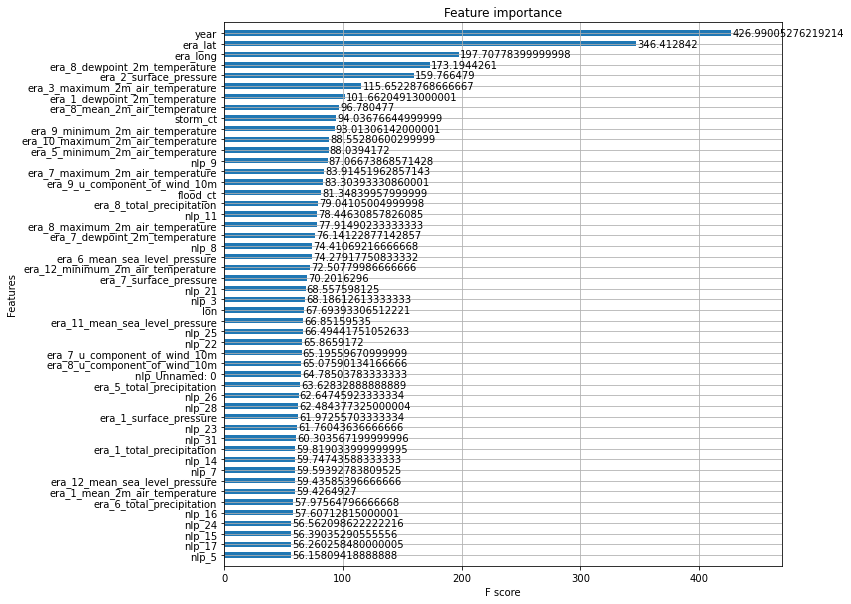

In [109]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

In [126]:
#adapted from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# thresholds = sort(model.feature_importances_)
max_feature_ls=[40,60,80,100,120]
for max_feature in max_feature_ls:
    # select features using threshold
    selection = SelectFromModel(model, threshold=-np.inf, prefit=True, max_features=max_feature)
    select_X_train = selection.transform(x_train)
    select_X_test = selection.transform(x_test)

    # train model
    y_pred, y_pred_prob, model2 = run_xgb(select_X_train, y_train, select_X_test)
    m.get_scores_clf(y_test, y_pred_prob)


running xgb...
Train AUC:  0.8350490213030697
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.5405349204983632 0.7
auc, f1, accu, accu_bl, precision, recall=  0.735692375227259 0.5405349204983632 0.8432325794405693 0.581830488807233 0.07302224485146713 0.2882882882882883
[[11744  1672]
 [  553   224]]
running xgb...
Train AUC:  0.8396264527534829
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.5428319713498773 0.7
auc, f1, accu, accu_bl, precision, recall=  0.7406966287780241 0.5428319713498773 0.8378778270978652 0.5917289158568229 0.07584088916568787 0.3153153153153153
[[11647  1769]
 [  532   245]]
running xgb...
Train AUC:  0.8422335756228665
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.5439462512263764 0.7
auc, f1, accu, accu_bl, precision, recall=  0.7400756717617183 0.5439462512263764 0.8831818

In [122]:
# select features using threshold
selection = SelectFromModel(model, threshold=-np.inf, prefit=True, max_features=40)
select_X_train = selection.transform(x_train)
select_X_test = selection.transform(x_test)

# train model
y_pred, y_pred_prob, model2 = run_xgb(select_X_train, y_train, select_X_test)
m.get_scores_clf(y_test, y_pred_prob)


running xgb...
Train AUC:  0.8350490213030697
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.5405349204983632 0.7
auc, f1, accu, accu_bl, precision, recall=  0.735692375227259 0.5405349204983632 0.8432325794405693 0.581830488807233 0.07302224485146713 0.2882882882882883
[[11744  1672]
 [  553   224]]


(0.735692375227259,
 0.5405349204983632,
 0.8432325794405693,
 0.581830488807233,
 0.07302224485146713,
 0.2882882882882883)

In [105]:
select_X_train.shape

(33117, 85)

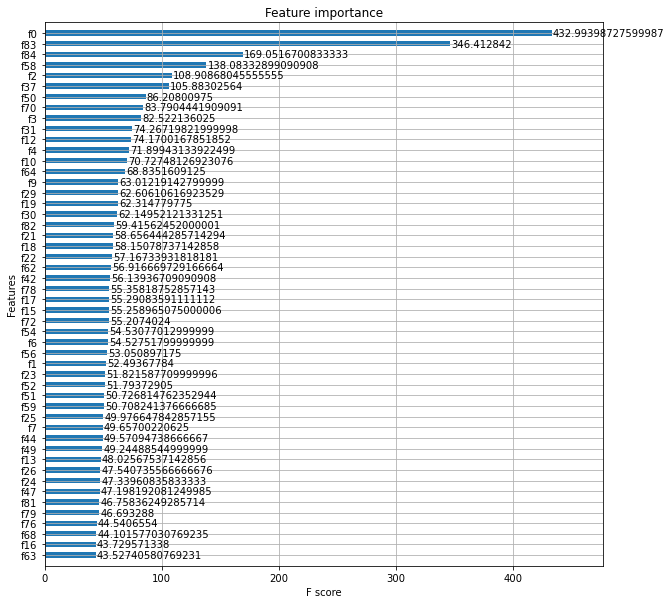

In [113]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model2, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

In [178]:
## to do: 
#- add feature selection 
#- right now multimodal does not have an edge 
#- organise code to try other types of text features 